In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from matplotlib.pyplot import figure
from datetime import datetime

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
QQQ_monthly = pd.read_csv('/content/drive/MyDrive/6401-etf-usdx-project/data 10 years/QQQ-monthly.csv')

QQQ_monthly['Date'] = pd.to_datetime(QQQ_monthly['Date'], infer_datetime_format=True)
QQQ_monthly

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-01,96.187500,97.625000,79.750000,89.687500,77.785660,583431800
1,2000-02-01,89.531250,107.500000,88.437500,106.750000,92.583900,575169800
2,2000-03-01,107.250000,120.500000,101.000000,109.500000,94.968971,721106900
3,2000-04-01,107.765625,109.125000,78.000000,94.750000,82.176331,678411400
4,2000-05-01,95.750000,96.875000,72.250000,83.125000,72.094032,563189300
...,...,...,...,...,...,...,...
260,2021-09-01,381.040009,382.779999,357.100006,357.959991,357.563568,931563200
261,2021-10-01,358.600006,386.279999,350.320007,386.109985,386.109985,878622400
262,2021-11-01,386.559998,408.709991,384.420013,393.820007,393.820007,922141600
263,2021-12-01,398.279999,400.480011,378.899994,383.130005,383.130005,267474300


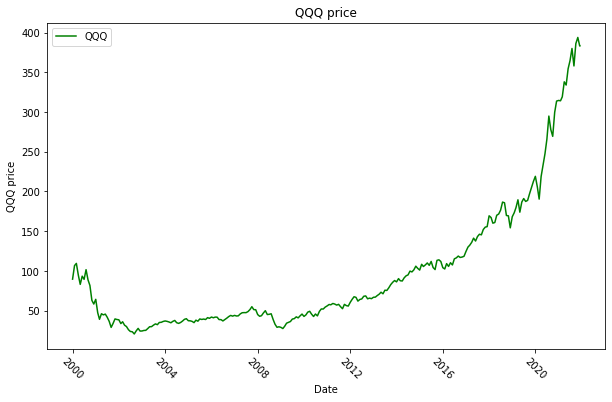

In [61]:
line = plt.plot(QQQ_monthly['Date'],QQQ_monthly['Close'], 'green',label = 'QQQ')
plt.title('QQQ price')
plt.legend()
plt.xticks(rotation = -45)
plt.xlabel("Date")
plt.ylabel("QQQ price")
plt.show()

In [62]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6


In [63]:
QQQ_monthly.drop(columns=(['Open','High','Low','Adj Close','Volume']),axis=1,inplace=True)
indexedQQQ_monthly=QQQ_monthly.set_index(['Date'])
indexedQQQ_monthly

,Close
Date,
2000-01-01,89.687500
2000-02-01,106.750000
2000-03-01,109.500000
2000-04-01,94.750000
2000-05-01,83.125000
...,...
2021-09-01,357.959991
2021-10-01,386.109985
2021-11-01,393.820007


In [64]:
#From the plot below, we can see that there is a Trend compoenent in th series. 
#Hence, we now check for stationarity of the data
#Determine rolling statistics
rolmean = indexedQQQ_monthly.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = indexedQQQ_monthly.rolling(window=12).std()
print(rolmean,rolstd)

                 Close
Date                  
2000-01-01         NaN
2000-02-01         NaN
2000-03-01         NaN
2000-04-01         NaN
2000-05-01         NaN
...                ...
2021-09-01  329.950000
2021-10-01  339.677498
2021-11-01  347.527499
2021-12-01  353.310000
2021-12-03  359.024167

[265 rows x 1 columns]                 Close
Date                 
2000-01-01        NaN
2000-02-01        NaN
2000-03-01        NaN
2000-04-01        NaN
2000-05-01        NaN
...               ...
2021-09-01  31.069037
2021-10-01  28.552765
2021-11-01  29.472949
2021-12-01  29.045258
2021-12-03  27.428828

[265 rows x 1 columns]


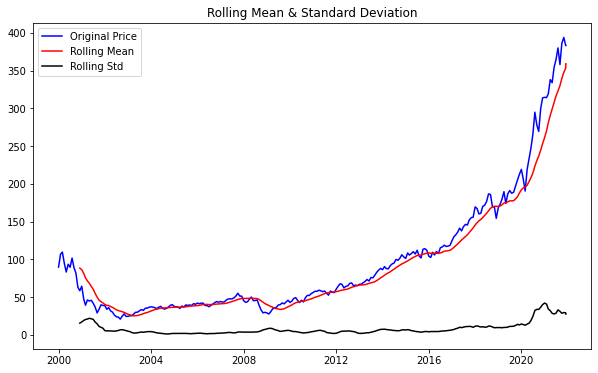

In [65]:
#Plot rolling statistics
orig = plt.plot(indexedQQQ_monthly, color='blue', label='Original Price')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best') #upper left location
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [66]:
'''

"From the above graph, we see that rolling mean itself has a trend component even though 
rolling standard deviation is fairly constant with time. For our time series to be stationary, 
we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. 
Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so.

To further augment our hypothesis that the time series is not stationary, let us perform the ADCF test."

'''
 
 

'\n\n"From the above graph, we see that rolling mean itself has a trend component even though \nrolling standard deviation is fairly constant with time. For our time series to be stationary, \nwe need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. \nThus the curves for both of them have to be parallel to the x-axis, which in our case is not so.\n\nTo further augment our hypothesis that the time series is not stationary, let us perform the ADCF test."\n\n'

In [67]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedQQQ_monthly['Close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   3.342550
p-value                          1.000000
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


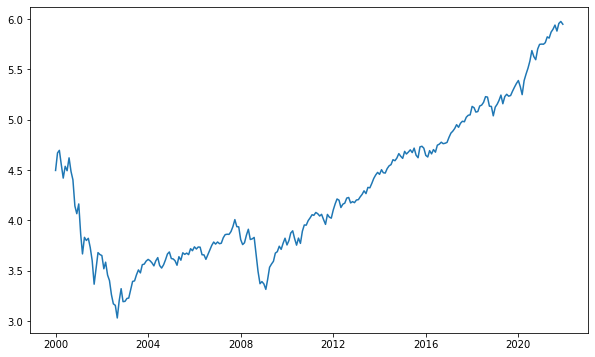

In [68]:


#Estimating trend
indexedQQQ_monthly_logScale = np.log(indexedQQQ_monthly)
plt.plot(indexedQQQ_monthly_logScale)



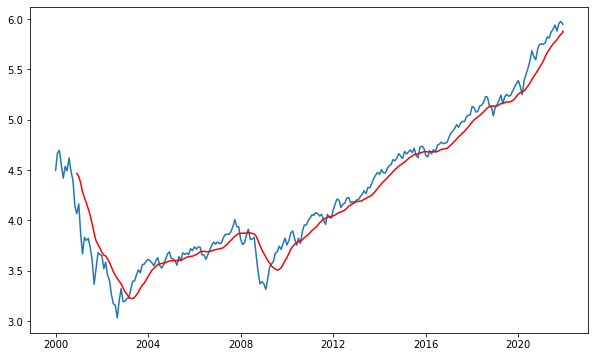

In [69]:
#The below transformation is required to make series stationary
movingAverage = indexedQQQ_monthly_logScale.rolling(window=12).mean()
movingSTD = indexedQQQ_monthly_logScale.rolling(window=12).std()
plt.plot(indexedQQQ_monthly_logScale)
plt.plot(movingAverage, color='red')


In [70]:
datasetLogScaleMinusMovingAverage = indexedQQQ_monthly_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)


,Close
Date,
2000-12-01,-0.398541
2001-01-01,-0.274138
2001-02-01,-0.510454
2001-03-01,-0.617019
2001-04-01,-0.392577
2001-05-01,-0.372188
2001-06-01,-0.291135
2001-07-01,-0.317827
2001-08-01,-0.363863


In [71]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Close'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    



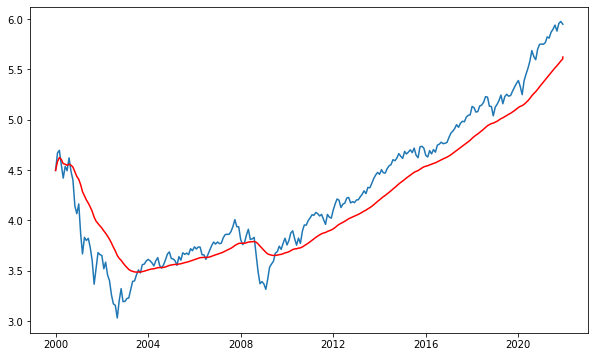

In [72]:
exponentialDecayWeightedAverage = indexedQQQ_monthly_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedQQQ_monthly_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')


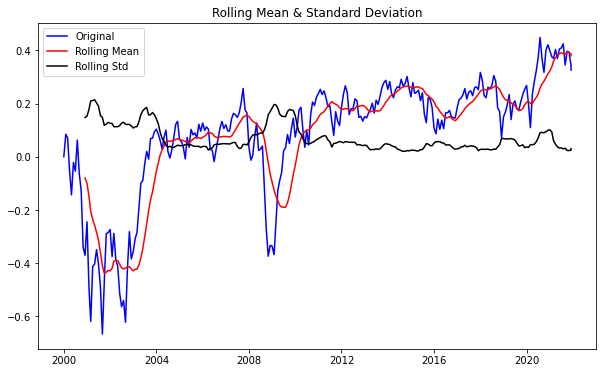

Results of Dickey Fuller Test:
Test Statistic                  -2.198182
p-value                          0.206906
#Lags Used                       0.000000
Number of Observations Used    264.000000
Critical Value (1%)             -3.455365
Critical Value (5%)             -2.872551
Critical Value (10%)            -2.572638
dtype: float64


In [73]:
datasetLogScaleMinusExponentialMovingAverage = indexedQQQ_monthly_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

#p-value is not very good and the series for moving avg & std. dev. is not parallel to x-axis

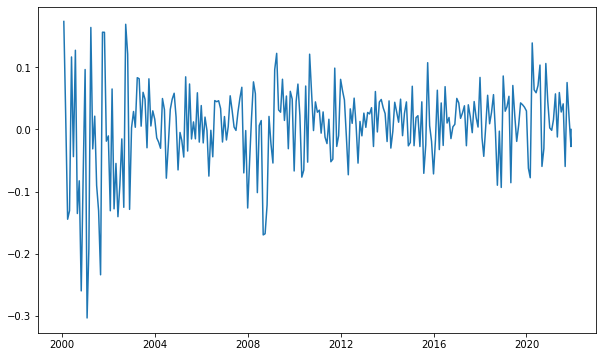

In [74]:
datasetLogDiffShifting = indexedQQQ_monthly_logScale - indexedQQQ_monthly_logScale.shift()
plt.plot(datasetLogDiffShifting)


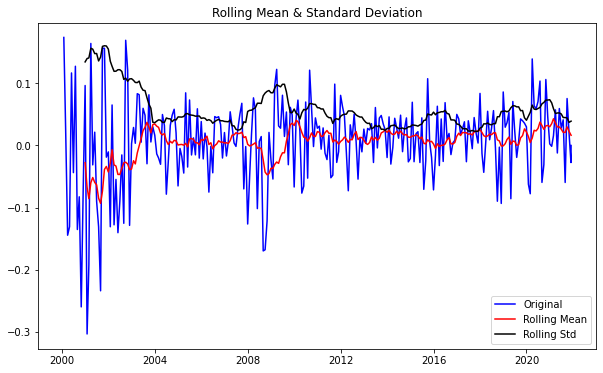

Results of Dickey Fuller Test:
Test Statistic                -1.516872e+01
p-value                        6.436001e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.630000e+02
Critical Value (1%)           -3.455461e+00
Critical Value (5%)           -2.872593e+00
Critical Value (10%)          -2.572660e+00
dtype: float64


In [75]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

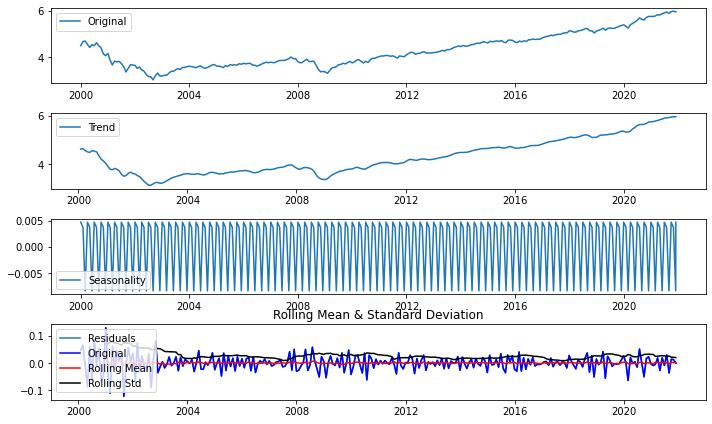

Results of Dickey Fuller Test:
Test Statistic                -7.323997e+00
p-value                        1.173998e-10
#Lags Used                     1.400000e+01
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


In [76]:
decomposition = seasonal_decompose(indexedQQQ_monthly_logScale, freq=3) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedQQQ_monthly_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

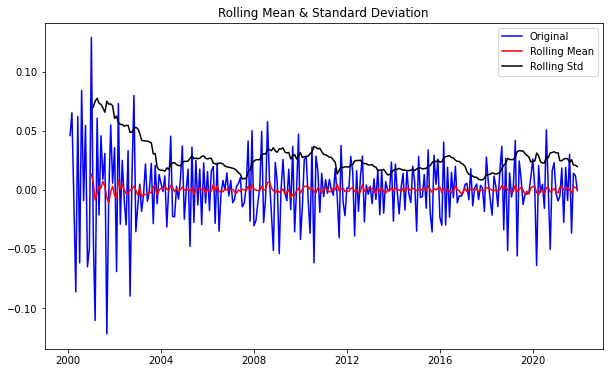

Results of Dickey Fuller Test:
Test Statistic                -7.323997e+00
p-value                        1.173998e-10
#Lags Used                     1.400000e+01
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


In [77]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



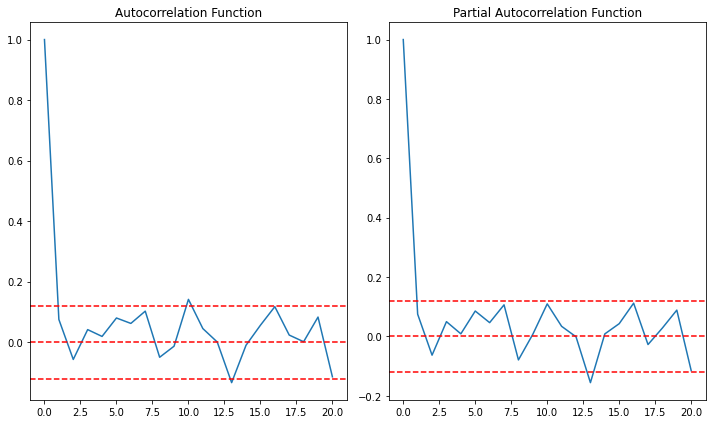

In [78]:
#ACF & PACF plots

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='red')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='red')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='red')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='red')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='red')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='red')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            



From the ACF graph, we see that curve touches y=0 and it crosses the first line at x=2 or 1. Thus, from theory, Q = 2 or 1 From the PACF graph, we see that curve touches y=0.0 line and crosses the first line at x=2 or 1. Thus, from theory, P = 2 or 1

ARIMA is AR + I + MA. Before, we see an ARIMA model, let us check the results of the individual AR & MA model. Note that, these models wi:ll give a value of RSS. Lower RSS values indicate a better model.


The above maybe wrong
P = 3,4,5,6,7 or 10
Q the same.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Plotting AR model


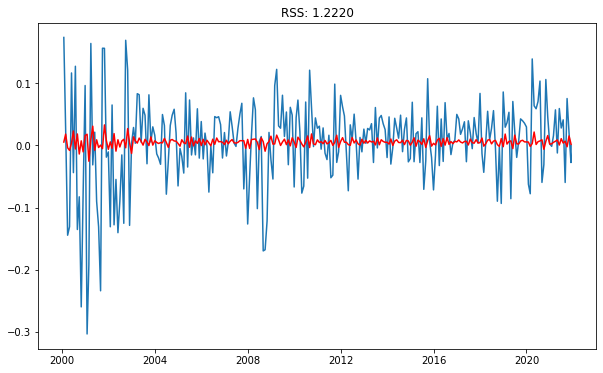

In [79]:
#AR Model
#making order=() gives RSS=
model = ARIMA(indexedQQQ_monthly_logScale, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - datasetLogDiffShifting['Close'])**2))
print('Plotting AR model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Plotting MA model


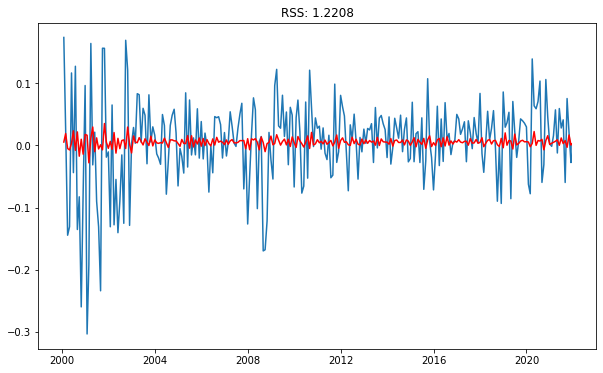

In [80]:
#MA Model
model = ARIMA(indexedQQQ_monthly_logScale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - datasetLogDiffShifting['Close'])**2))
print('Plotting MA model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Plotting ARIMA model


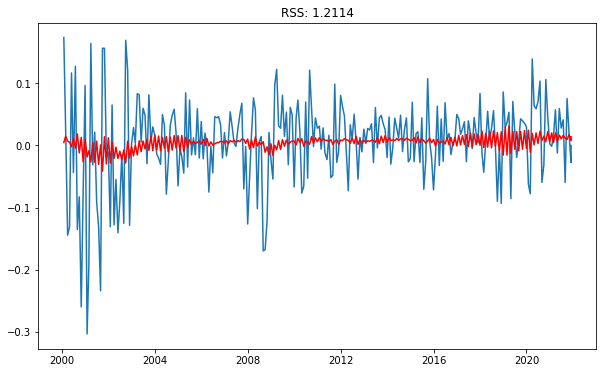

In [81]:
# AR+I+MA = ARIMA model
model = ARIMA(indexedQQQ_monthly_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['Close'])**2))
print('Plotting ARIMA model')

In [82]:
#rss = 1.2114 < rss of ar and rss of ma, so the arima is a better model for our time series.

In [83]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2000-02-01    0.004773
2000-03-01    0.014946
2000-04-01    0.007166
2000-05-01    0.005184
2000-06-01   -0.002001
dtype: float64


In [84]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)



Date
2000-02-01    0.004773
2000-03-01    0.019719
2000-04-01    0.026885
2000-05-01    0.032069
2000-06-01    0.030068
                ...   
2021-09-01    1.181455
2021-10-01    1.191033
2021-11-01    1.208807
2021-12-01    1.216947
2021-12-03    1.230998
Length: 264, dtype: float64


In [85]:
predictions_ARIMA_log = pd.Series(indexedQQQ_monthly_logScale['Close'].iloc[0], index=indexedQQQ_monthly_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()



Date
2000-01-01    4.496331
2000-02-01    4.501104
2000-03-01    4.516051
2000-04-01    4.523216
2000-05-01    4.528400
dtype: float64

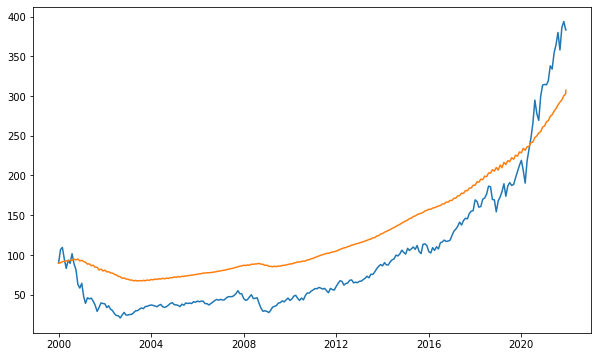

In [86]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedQQQ_monthly)
plt.plot(predictions_ARIMA)


In [87]:
indexedQQQ_monthly_logScale

,Close
Date,
2000-01-01,4.496331
2000-02-01,4.670490
2000-03-01,4.695925
2000-04-01,4.551242
2000-05-01,4.420345
...,...
2021-09-01,5.880421
2021-10-01,5.956122
2021-11-01,5.975894


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



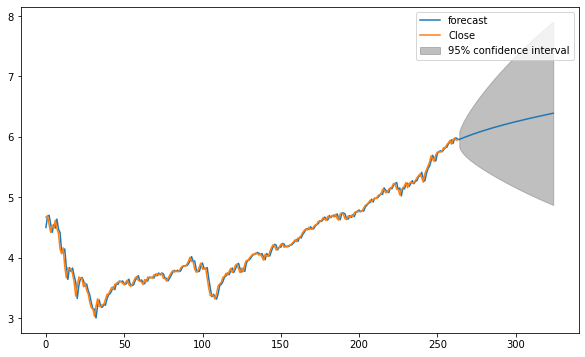

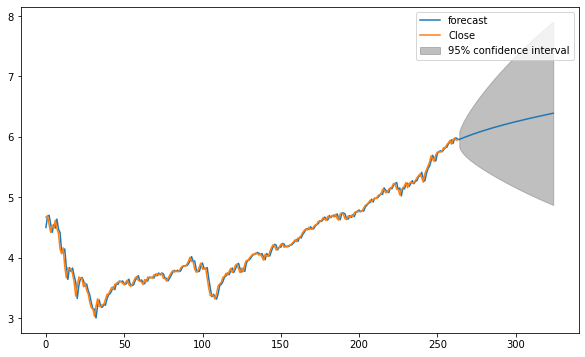

In [88]:
#We have 265(existing data of 20 yrs in months) data points. 
#And we want to forecast for additional 60 data points for 5 yrs.
results_ARIMA.plot_predict(1,325) 


